## OpenCV

#### cv2.imread, cv2.IMREAD_UNCHANGED, cv2.IMREAD_GRAYSCALE, cv2.IMREAD_COLOR
#### cv2.cvtColor(..., cv2.COLOR_{CURRENT}2{NEW})
#### cv2.split, cv2.merge
#### cv2.imshow, cv2.waitKey, cv2.destroyAllWindows()
#### cv2.imwrite

In [42]:
import cv2
import numpy as np

### load image and check whether it was loaded properly

In [43]:
img = cv2.imread("lion.jpg")

In [44]:
if img is None:
    print("Image not found.")

### display image

In [53]:
cv2.imshow("Lion",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### split channels

In [46]:
blue, green, red = cv2.split(img)

In [47]:
cv2.imshow("Blue", blue)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
cv2.imshow("Green", green)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
cv2.imshow("Red", red)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
cv2.imwrite("Blue.png", blue)
cv2.imwrite("Green.png", green)
cv2.imwrite("Red.png", red)

True

## matplotlib

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

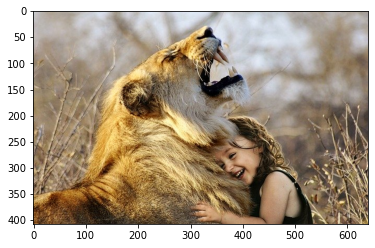

In [68]:
img = cv2.imread("lion.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

In [69]:
img.shape

(407, 640, 3)

#### water effect

In [139]:
img_new = np.zeros((814,640,3), dtype=np.uint8)
img_new_preview = np.zeros((814,640,3), dtype=np.uint8)

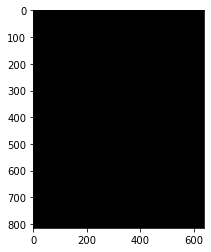

In [140]:
plt.imshow(img_new[:,:,::-1])
plt.show()

In [142]:
img_new[:407,:,:] = img
img_new_preview[:407,:,:] = img

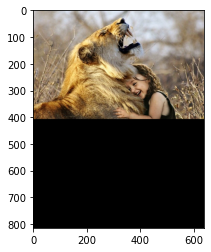

In [143]:
plt.imshow(img_new_preview[:,:,::-1])
plt.show()

In [78]:
img_invert = img[::-1,:,:]

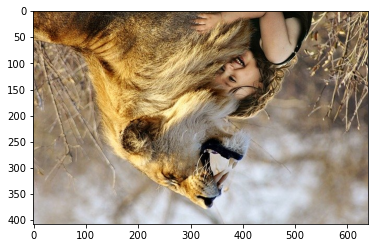

In [84]:
plt.imshow(img_invert[:,:,::-1])
plt.show()

In [137]:
img_new[407:][:] = img_invert

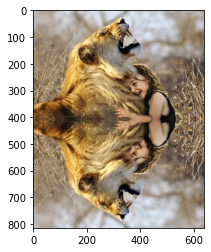

In [138]:
plt.imshow(img_new[:,:,::-1])
plt.show()

In [82]:
cv2.imwrite("LionWaterEffect.png", img_new)

True

#### mirror effect

In [93]:
img_new2 = np.zeros((407,1280,3), dtype=np.uint8)  # create array for two joined images

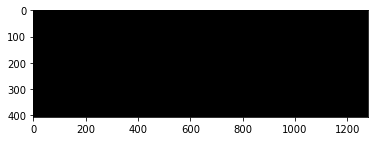

In [87]:
plt.imshow(img_new2[:,:,::-1])  
plt.show()

In [96]:
img_new2[:,:640,:] = img  # include the basic image on the left of the created array

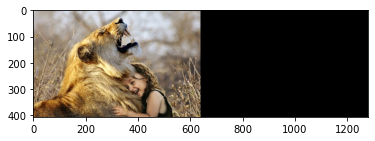

In [97]:
plt.imshow(img_new2[:,:,::-1])
plt.show()

In [98]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # convert image from BGR to HSV

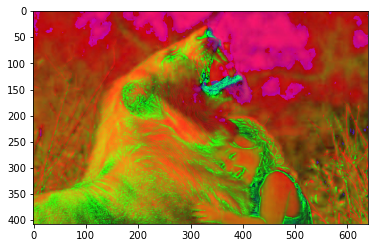

In [100]:
plt.imshow(img_hsv[:,:,::-1])
plt.show()

In [101]:
h, s, v = cv2.split(img_hsv)  # split hue, saturation, and value channels

In [102]:
cv2.imshow("value", v)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [109]:
v_negative = 255 - v  # create "negative" effect by subtracting value channel from 255

In [110]:
cv2.imshow("negative", v_negative)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [111]:
img_neg = cv2.merge((v_negative, v_negative, v_negative))  # merge negative value with itself

In [117]:
img_neg_inv = img_neg[:,::-1,:]  # invert negative image

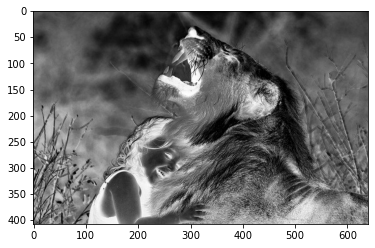

In [118]:
plt.imshow(img_neg_inv[:,:,::-1])
plt.show()

In [119]:
img_new2[:,640:,:] = img_neg_inv  # join negative image with normal one

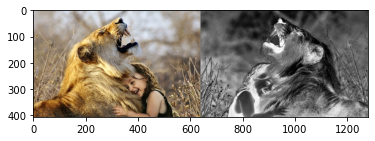

In [120]:
plt.imshow(img_new2[:,:,::-1])
plt.show()

In [122]:
cv2.imwrite("LionMirrorEffect.png",img_new2)  # save the file

True